In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import about, basis, destroy, mcsolve, mesolve

%matplotlib inline


In [2]:
N = 5  # number of modes in the
a = destroy(N)  # Destroy operator
H = a.dag() * a  # oscillator Hamiltonian
psi0 = basis(N, 1)  # Initial Fock state with one photon

collapse operators for photon annihillation and photon creation

In [4]:
kappa = 1.0 / 0.129  # Coupling rate to heat bath
nth = 0.063  # Temperature with <n>=0.063

# collapse operators for the thermal bath
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
# annihillation
c_ops.append(np.sqrt(kappa * nth) * a.dag())
# creation

Monte cralo for non averaged ensemble evolution of the system

In [15]:
ntraj = [1, 5, 15, 904]
mc = []
tlist = np.linspace(0, 0.8, 100)

for n in ntraj:
    result = mcsolve(H, psi0, tlist, c_ops, [a.dag() * a], ntraj=n)
    mc.append(result)
me = mesolve(H, psi0, tlist, c_ops, [a.dag() * a])

100.0%. Run time:   0.00s. Est. time left: 00:00:00:00
Total run time:   0.01s
20.0%. Run time:   0.00s. Est. time left: 00:00:00:00
40.0%. Run time:   0.00s. Est. time left: 00:00:00:00
60.0%. Run time:   0.01s. Est. time left: 00:00:00:00
80.0%. Run time:   0.01s. Est. time left: 00:00:00:00
100.0%. Run time:   0.02s. Est. time left: 00:00:00:00
Total run time:   0.02s
13.3%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
33.3%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
53.3%. Run time:   0.03s. Est. time left: 00:00:00:00
60.0%. Run time:   0.04s. Est. time left: 00:00:00:00
73.3%. Run time:   0.04s. Est. time left: 00:00:00:00
80.0%. Run time:   0.05s. Est. time left: 00:00:00:00
93.3%. Run time:   0.05s. Est. time left: 00:00:00:00
100.0%. Run time:   0.06s. Est. time left: 00:00:00:00
Total run time:   0.06s
10.1%. Run time:   0.18s. Est. time left: 00:00:00:01
20.0%. 

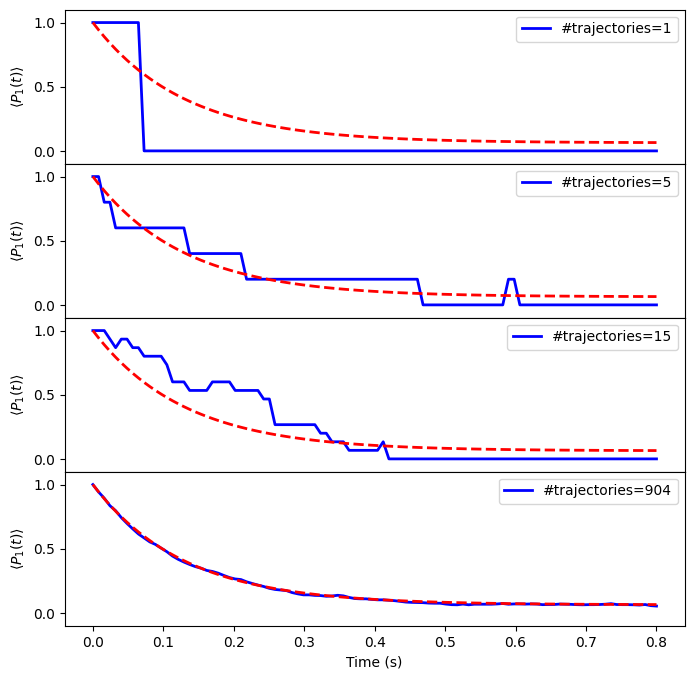

In [16]:
fig = plt.figure(figsize=(8, 8), frameon=False)
plt.subplots_adjust(hspace=0.0)

for i in range(len(ntraj)):
    ax = plt.subplot(4, 1, i + 1)
    ax.plot(
        tlist, mc[i].expect[0], "b", lw=2,
        label="#trajectories={}".format(ntraj[i])
    )
    ax.plot(tlist, me.expect[0], "r--", lw=2)
    ax.set_yticks([0, 0.5, 1])
    ax.set_ylim([-0.1, 1.1])
    ax.set_ylabel(r"$\langle P_{1}(t)\rangle$")
    ax.legend()

ax.set_xlabel(r"Time (s)");